In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
import scipy

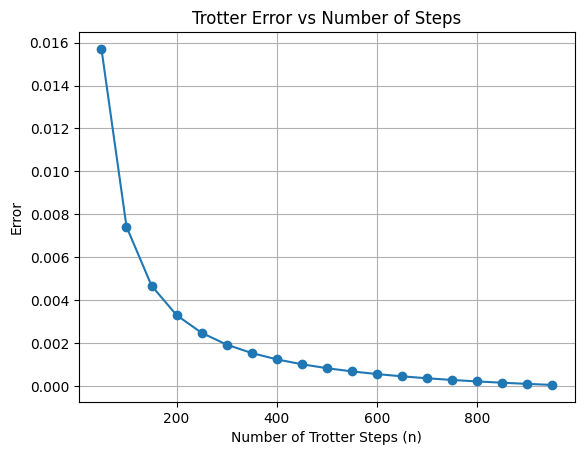

In [ ]:
def hamiltonian(n, t=10):
    # calculate matrix
    rx = np.matrix([[np.cos(t/n), -1j*np.sin(t/n)],
                    [-1j*np.sin(t/n), np.cos(t/n)]])
    rz = np.matrix([[np.exp(-1j*t*0.1/n), 0],
                    [0, np.exp(1j*t*0.1/n)]])
    result = np.identity(2, dtype=complex)
    for _ in range(n):
        result = np.matmul(result, rx)
        result = np.matmul(result, rz)
    return result

all = []
n_values = range(50, 1001, 50)

np.set_printoptions(suppress=True)
for i in n_values:
    h = hamiltonian(i)
    all.append(h)
    #print(i, ":\n", np.round(h, 4), sep="")

y = []
for i in range(len(all)-1):
    #print("Difference between 1000 and ", n_values[i], ": ", scipy.linalg.norm(all[-1] - all[i]), sep="")
    y.append(scipy.linalg.norm(all[-1] - all[i]))

#y = [i + 0.001 for i in y]

plt.plot(n_values[:-1], y, marker='o')
plt.xlabel('Number of Trotter Steps (n)')
plt.ylabel('Error')
#plt.xscale('log')
#plt.yscale('log')
plt.title('Trotter Error vs Number of Steps')
plt.grid()
plt.show()